In [14]:
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D, Embedding, LSTM, MaxPooling1D,BatchNormalization,GRU, SpatialDropout1D
from keras.layers.core import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras import metrics, regularizers
from keras.preprocessing import sequence
import pandas as pd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Top30.csv']


In [16]:
from keras.models import Sequential
# from keras.layers import Conv1D, GlobalMaxPooling1D, Embedding, LSTM
from keras.layers.core import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras import metrics, regularizers
from keras.preprocessing import sequence
import pandas as pd

from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer



import keras
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())
import numpy as np
import pandas as pd
from collections import defaultdict
import re


import sys
import os

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout
from keras.models import Model
from sklearn.metrics import classification_report

from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
from matplotlib import pyplot as plt
from keras.layers import Dense, Embedding, LSTM, GRU

# MAX_SEQUENCE_LENGTH = 1000
# MAX_NB_WORDS = 200000
# EMBEDDING_DIM = 100
# VALIDATION_SPLIT = 0.2


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15047166100564551706
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 8868874580649999657
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 6374709817177748566
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15882446439
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2862892387606579713
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [17]:
data = pd.read_csv('../input/Top30.csv')

In [18]:
data = data.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
data['Description'] = data['Description'].apply(clean_text)
data['Query'] = data['Query'].apply(clean_text)

In [19]:
#Split the dataset to Training and Test subsets (90/10)
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2, random_state = 17) #random_state = None

train_descs = train['Description']
train_labels = train['Query']
 
test_descs = test['Description']
test_labels = test['Query']


# X_train, X_val, y_train, y_val  = train_test_split(train_descs, train_labels, test_size=0.2, random_state=17)

In [20]:
data.shape

(72292, 4)

In [24]:
# Model Parameters
vocab_size = 1000

sequences_length = 1200

embedding_dimensionality = 64 #possibly low??
max_features = 2000 #equal to vocab_size

num_labels = len(train_labels.unique())
batch_size = 32
nb_epoch = 5

nof_filters = 200
kernel_size = 16

hidden_dims = 512

In [22]:
# Convert Texts to Numeric Vectors for Input
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(train_descs)

x_train = tokenizer.texts_to_sequences(train_descs)
x_test = tokenizer.texts_to_sequences(test_descs)

x_train = sequence.pad_sequences(x_train, maxlen = sequences_length, padding = 'post')
x_test = sequence.pad_sequences(x_test, maxlen = sequences_length, padding = 'post')

encoder = LabelBinarizer()
encoder.fit(train_labels)
y_train = encoder.transform(train_labels)
y_test = encoder.transform(test_labels)

In [40]:
keep_prob = 0.8
modell = Sequential()
modell.add(Embedding(max_features, embedding_dimensionality, input_length = 1200))
modell.add(Dropout(rate = 1 - keep_prob))
modell.add(Conv1D(filters=64, kernel_size=20, padding='same', activation='relu'))
modell.add(MaxPooling1D(pool_size=2))
modell.add(Conv1D(filters=32, kernel_size=10, padding='same', activation='relu'))
modell.add(MaxPooling1D(pool_size=2))
modell.add(Flatten())
modell.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
modell.add(Dense(30, activation='softmax'))
modell.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(modell.summary())
hist =modell.fit(x_train, y_train, validation_data=(x_test ,y_test) ,epochs=10, batch_size=128)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 1200, 64)          128000    
_________________________________________________________________
dropout_9 (Dropout)          (None, 1200, 64)          0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 1200, 64)          81984     
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 600, 64)           0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 600, 32)           20512     
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 300, 32)           0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 9600)              0         
__________

In [34]:
score = modell.evaluate(x_test, y_test, batch_size = batch_size, verbose = True)
 
print('\nTest categorical_crossentropy:', score[0])
print('Categorical accuracy:', score[1])


14459/14459 [==============================] - 1s 98us/step

Test categorical_crossentropy: 3.2664938251031814
Categorical accuracy: 0.9005463724726999


In [36]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import numpy as np
predicted = modell.predict(x_test)
pred_1 = np.argmax(predicted, axis = 1)
y_test_1 = np.argmax(y_test,axis = 1)
#np.mean(pred_1 == y_test_1,axis=1)
print('Accuracy\n',accuracy_score(pred_1, y_test_1))
#print('Confusion Matrix\n',confusion_matrix(predicted, y_test_1))
print('classification_score\n',classification_report(pred_1, y_test_1))

Accuracy
 0.9005463725015561
classification_score
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       384
           1       0.59      0.96      0.73       259
           2       0.81      0.83      0.82       873
           3       0.98      0.76      0.86       519
           4       0.85      0.84      0.84       475
           5       0.94      0.92      0.93       365
           6       0.90      0.92      0.91       818
           7       1.00      1.00      1.00       380
           8       0.72      0.70      0.71       315
           9       0.83      0.82      0.82       367
          10       1.00      1.00      1.00       721
          11       0.71      0.88      0.78       280
          12       1.00      1.00      1.00       414
          13       0.91      0.92      0.92       373
          14       0.95      0.88      0.91       401
          15       1.00      1.00      1.00       647
          16       0.95      0

In [37]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


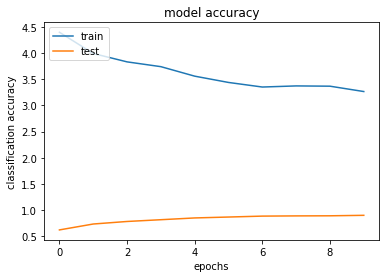

In [38]:
# summarize history for accuracy
import matplotlib.pyplot as plt

plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('classification accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()